# 워드 클라우드

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
!pip install konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving crawling_wordcloud.txt to crawling_wordcloud.txt


In [30]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving crawling_wordcloud.png to crawling_wordcloud.png


## 한글 텍스트 전처리

In [4]:
with open(textfile) as fp:
    text = fp.read()

In [5]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
tokens = okt.nouns(text)
tokens[:8]

['갤럭시', '부터', '갤럭시', '삼성', '스마트폰', '역사', '보기', '갤럭시']

In [9]:
# 영문자, 숫자 제거
import re
new_tokens =[]
for token in tokens:
    phone = re.sub('[A-Za-z0-9]','',token)   # \w
    if phone:
        new_tokens.append(phone)

In [10]:
# 한글 폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

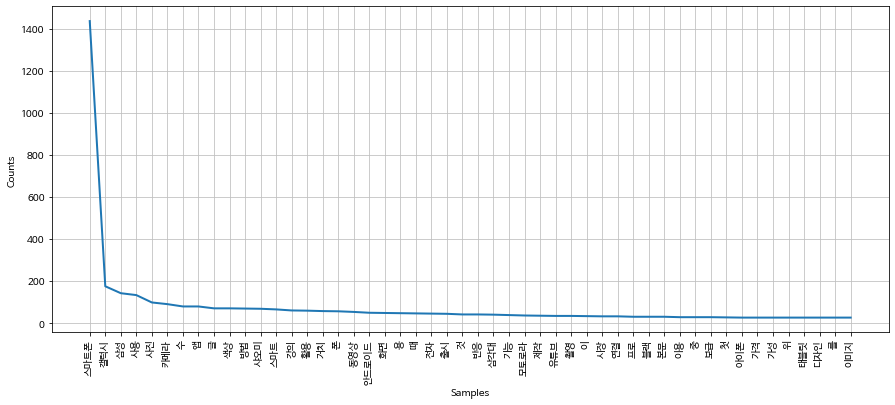

In [13]:
phone = nltk.Text(new_tokens, name='smph')
plt.figure(figsize=(15,6))
phone.plot(50)
plt.show()

In [16]:
'''stoptext = """
    1 2 3
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]'''
new_tokens[:10]

['갤럭시', '부터', '갤럭시', '삼성', '스마트폰', '역사', '보기', '갤럭시', '부터', '갤럭시']

## 워드 클라우드 그리기

In [17]:
from wordcloud import WordCloud
from PIL import Image

In [18]:
data = phone.vocab().most_common(300)
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white'
).generate_from_frequencies(dict(data))

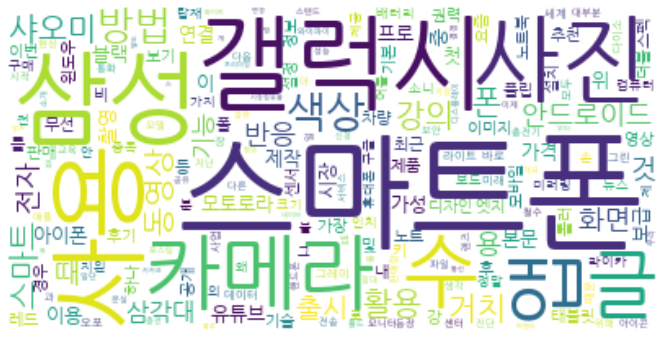

In [19]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- phone 그림에 표시

In [32]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [33]:
wc = WordCloud(
        font_path=path, relative_scaling=0.2,
        background_color='white', mask=mask,
        min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

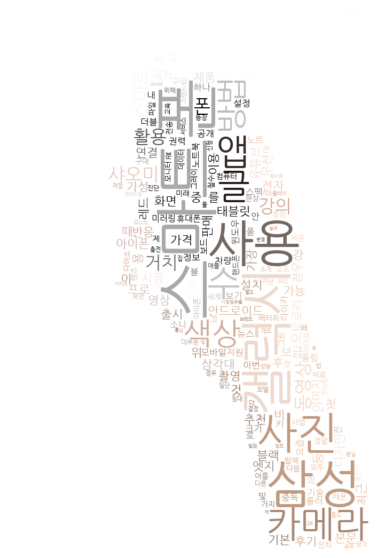

In [66]:
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()

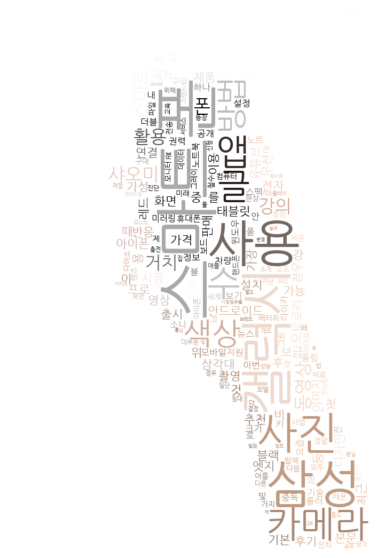

In [70]:
fig = plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), 
           interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig('phwc.png')